For discrete variable:
$$ D_{KL}(p || q) = \sum_{i}p(x_i)(logp(x_i) - logq(x_i)) $$

For continuous variable:
$$ D_{KL}(p || q) = \int p(x)(logp(x) - logq(x)) dx $$

**Reference**:
- [1](https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained)
- [2](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/jeremy.zhang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jeremy.zhang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Generate random distribution

In [21]:
def sample_gen(n=1000):
    samples = []
    for _ in range(n):
        if np.random.uniform() <= 0.5:
            x = np.random.uniform(-2, 2)
        else:
            x = np.random.normal(1, 1)
        samples.append(x)
    return samples

/Users/jeremy.zhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


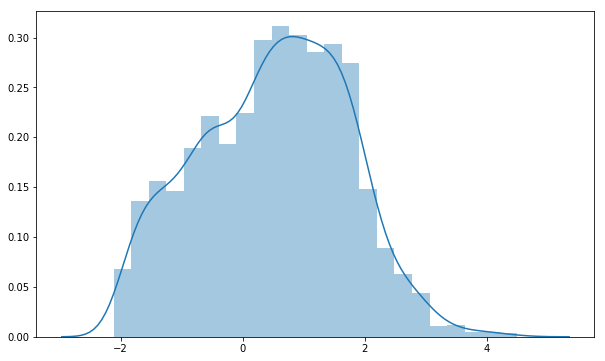

In [25]:
samples = sample_gen(n=2000)
plt.figure(figsize=[10, 6])
sns.distplot(samples)

<function matplotlib.pyplot.legend(*args, **kwargs)>

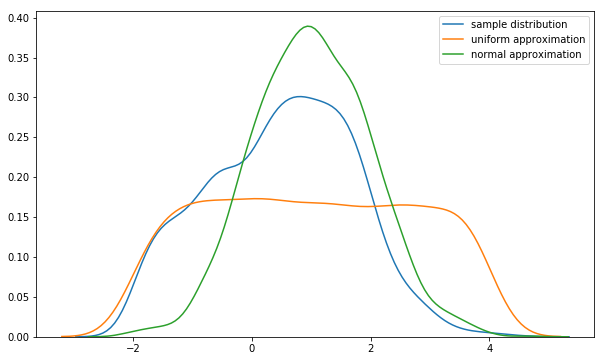

In [38]:
n = 2000
uni_samples = np.random.uniform(-2, 4, n)
norm_samples = np.random.normal(1, 1, n)

plt.figure(figsize=[10, 6])

sns.distplot(samples, hist=False, label="sample distribution")
sns.distplot(uni_samples, hist=False, label="uniform approximation")
sns.distplot(norm_samples, hist=False, label="normal approximation")

plt.legend